# 00. Table of Contents

01. Notebook Setup

- Import libraries
- Import datasets as dataframes
- Create a subset 
- Prep and clean the data for analysis

02. Clustering - The Elbow Technique
03. Clustering - K-means

- Run the k-means algorithm
- Cluster Visualizations
- Descriptive Statistics for Clusters

04. Conclusions from Cluster Analysis
05. Export Cluster Result Datafram

# 01. Notebook Setup

## 01.01 Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define the path to be used for this notebook

path = '/Users/laineyodette/Documents/_proDocs/professional development/Learning/Learning - Data Analytics/CareerFoundry - Become a Data Analyst/Data Immersion Course/A6 - Advanced Analytics and Dashboard Design/Book Project'


## 01.02 Import datasets as dataframe

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Dataset', 'ratingsUsers.csv'), index_col = 0)

In [5]:
df.shape

(409283, 9)

In [6]:
df.head()

,User-ID,ISBN,Book-Rating,Age,Location,Country,Original Country,Age Category,Rating Category
0,276726,0155061224,5,22,"seattle, washington, usa",United States of America,usa,Young,Mid Rating
1,276729,052165615X,3,16,"rijeka, n/a, croatia",Croatia,croatia,Young,Low Rating
2,276729,0521795028,6,16,"rijeka, n/a, croatia",Croatia,croatia,Young,Mid Rating
3,276736,3257224281,8,27,"salzburg, salzburg, austria",Austria,austria,Adult,High Rating
4,276737,0600570967,6,14,"sydney, new south wales, australia",Australia,australia,Young,Mid Rating


## 01.03 Create a subset

In [7]:
# Create a subset with the columns I want to work with for this analysis

# List of columns you want to use in your analysis
columns2use = ['User-ID', 'Book-Rating', 'Age']

# Create a subset DataFrame with only the specified columns
df_subset = df[columns2use]

# Print the resulting DataFrame to verify
print(df_subset.head())

   User-ID  Book-Rating  Age
0   276726            5   22
1   276729            3   16
2   276729            6   16
3   276736            8   27
4   276737            6   14


In [8]:
df = df_subset

## 01.04 Prep and clean the data for analysis

In [9]:
df.head()

,User-ID,Book-Rating,Age
0,276726,5,22
1,276729,3,16
2,276729,6,16
3,276736,8,27
4,276737,6,14


In [10]:
df.shape

(409283, 3)

In [11]:
df.isnull().sum()

User-ID        0
Book-Rating    0
Age            0
dtype: int64

**Note** 

Since the Age and Book-Rating ranges are not drastically different (like a 1-10 rating versus numbers in the millions), they are in fact all under 100, I did not opt to standardize the data.

# 02. Clustering - The Elbow Technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/laineyodette/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/laineyodette/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/laineyodette/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/laineyodette/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-2591103972647793.0,
 -645627737257737.8,
 -296364043484629.6,
 -157566886171886.88,
 -102674383985442.69,
 -73011380678850.03,
 -52220539331257.125,
 -40928797311446.75,
 -32164698643119.895]

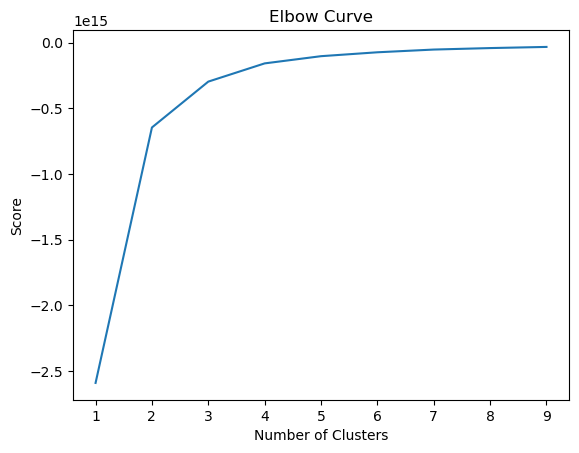

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**Observation** 

There's a large jump from two to three on the x-axis, and then a smaller jump from three to four. But after that, the curve straightens out. This means that the optimal count for your clusters is four.

# 03. Clustering - K-means

## 03.01 Run the k-means algorithm

In [15]:
# Create the k-means object with four clusters.

kmeans = KMeans(n_clusters = 4) 


In [16]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/laineyodette/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [17]:
df['clusters'] = kmeans.fit_predict(df)

/Users/laineyodette/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
df.head()

,User-ID,Book-Rating,Age,clusters
0,276726,5,22,0
1,276729,3,16,0
2,276729,6,16,0
3,276736,8,27,0
4,276737,6,14,0


In [19]:
df['clusters'].value_counts()

clusters
1    107620
0    102259
2    102150
3     97254
Name: count, dtype: int64

## 03.02 Cluster Visualizations

/Users/laineyodette/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


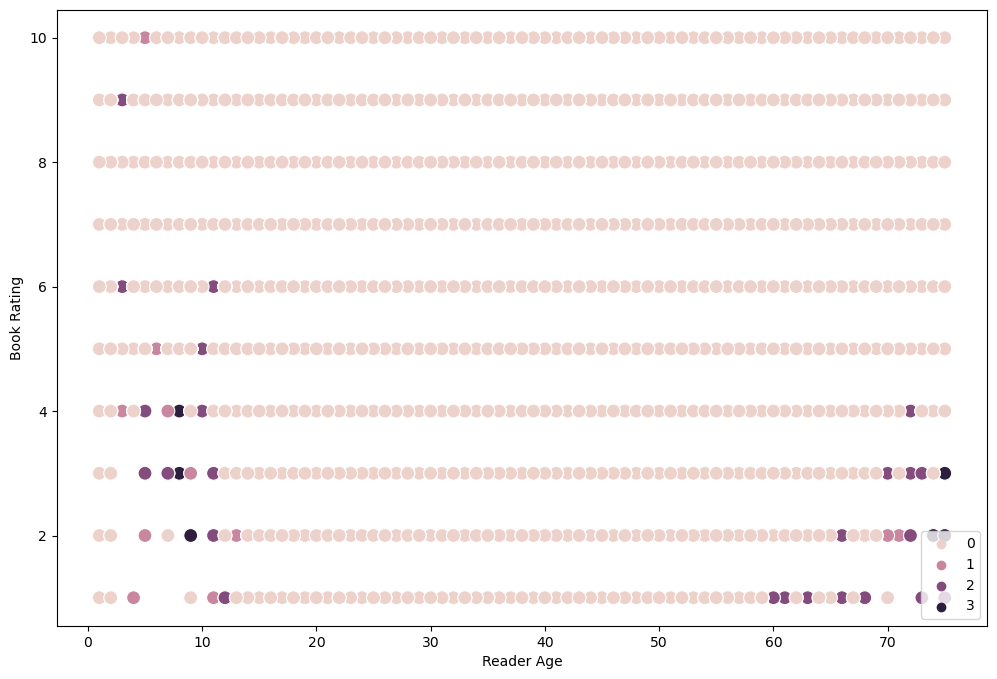

In [20]:
# Plot the clusters for the "Book-Rating" and "Age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Age'], y=df['Book-Rating'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Reader Age') 
plt.ylabel('Book Rating') 
plt.show()

**Observation**

Since I am only limited to two numerical pieces of data in my dataset, there aren't any other plots I can complete.

The clusters make sense based on previous analysis, so don't really provide any new insights. 

What I see (again, as previously observed) is that there are a larger number of data points in the upper and lower age ranges. I'm not seeing them specifically in the visual because there are so many clustering in the same place. The clustered data for these older and younger readers are falling in the lower ratings areas. This feels in line with some of the other analysis, so it inforces previous observations but does not necessarily provide new insight.

Adding categorical insights will help provide more information an insight that may be supported by this observation. Stay tuned!


## 03.03 Descriptive Statistics for Clusters

In [21]:
df.loc[df['clusters'] == 3, 'cluster'] = 'navy'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [22]:
df.groupby('cluster').agg({'Age':['mean', 'median'], 
                          'Book-Rating':['mean', 'median']})

Age        Book-Rating       
                  mean median        mean median
cluster                                         
dark purple  36.262203   35.0    7.559168    8.0
navy         35.416127   34.0    7.632334    8.0
pink         35.248017   33.0    7.596583    8.0
purple       35.648662   33.0    7.663557    8.0

**Observations**

- In looking at the book ratings, the fact that the mean for the clusters is "8" indicates that readers tend to rate books higher rather than lower, since that is the most popular rating given. The mean is close to this median, so the data is fairly symmetrical with a relatively normal distribution. 
- In looking at the reader ages, the median being at 32 and mean being around 34-35 indicates that most readers are in their early-to-mid 30's. Also, since the mean and median are close together, the datapoints are a fairly symmetrical distribution, just like the book ratings data.

# 04. Conclusions from Cluster Analysis

This analysis supported previous analyses in a few ways and offered a few new insights. 

- Younger and older readers tend to rate books higher. (previous observation)
- A large number of readers are in their early 30s, this is where the majority of ratings are coming from. (previous observation)
- A rating of "8" is the most likely to be given by the readership. (new observation)

# 05. Export Cluster Result Dataframe

In [25]:
# Export cluster df to Dataset folder with cluster column

df.to_csv(os.path.join(path, '02 Data','Dataset', 'ratingsUsers-CLUSTER.csv'))